***THIS FOCUS EXCLUSIVELY ON PREDICTING THE BREAST CANCER***

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# exploring the data to check the true nature
def wrangle(data):
    df = pd.DataFrame(data.data, columns=data.feature_names)

    #removing high colinearity
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    
    df = df.drop(columns=to_drop)

    return df

df = wrangle(data)
df


,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087


In [6]:
df["target"] = data.target
df["target"].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [9]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [10]:
df.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.011796,0.020542,0.290076,0.627417
std,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.006170,0.008266,0.061867,0.483918
min,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.007882,0.156500,0.000000
25%,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.007638,0.015160,0.250400,0.000000
50%,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.010930,0.018730,0.282200,1.000000
75%,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.014710,0.023480,0.317900,1.000000
max,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.052790,0.078950,0.663800,1.000000


***Exploration Analysis***


In [11]:
#checking the shape, the size of the data
df.shape, df.size

((569, 14), 7966)

In [12]:
#checking for info and missing number
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean smoothness         569 non-null    float64
 3   mean compactness        569 non-null    float64
 4   mean symmetry           569 non-null    float64
 5   mean fractal dimension  569 non-null    float64
 6   radius error            569 non-null    float64
 7   texture error           569 non-null    float64
 8   smoothness error        569 non-null    float64
 9   compactness error       569 non-null    float64
 10  concave points error    569 non-null    float64
 11  symmetry error          569 non-null    float64
 12  worst symmetry          569 non-null    float64
 13  target                  569 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 62.

In [13]:
df_isna = df.isna().sum().sum()
df_isna

np.int64(0)

In [14]:
#checking for correlation
corr = df.corr()
corr

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry,target
mean radius,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.376169,-0.104321,0.163953,-0.730029
mean texture,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.163851,0.009127,0.105008,-0.415185
mean smoothness,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.380676,0.200774,0.394309,-0.358560
mean compactness,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.642262,0.229977,0.510223,-0.596534
mean symmetry,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.699826,-0.330499
mean fractal dimension,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,0.334019,0.012838
radius error,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.094543,-0.567134
texture error,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,-0.128215,0.008303
smoothness error,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.328429,0.413506,-0.107342,0.067016
compactness error,0.206000,0.191975,0.318943,0.738722,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.744083,0.394713,0.277878,-0.292999


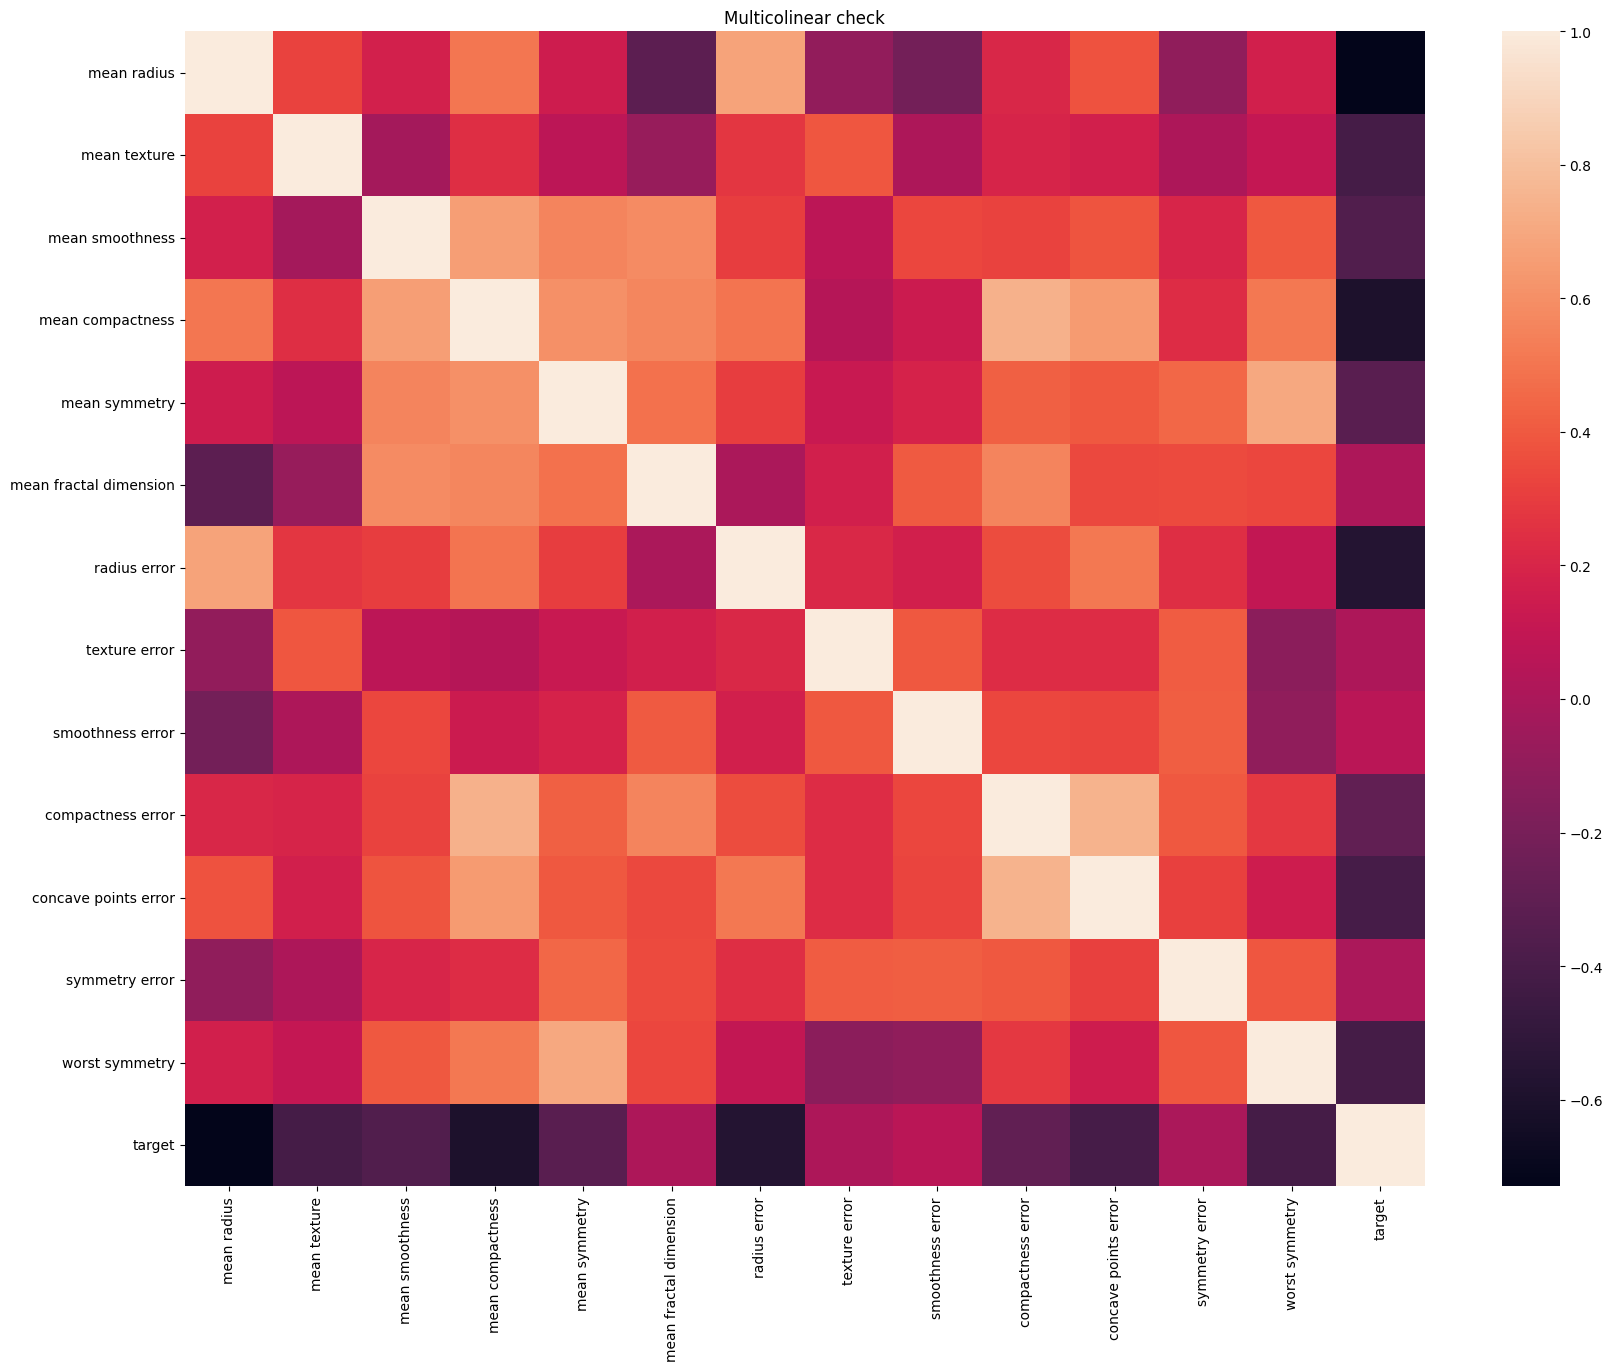

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr)
plt.title("Multicolinear check")
plt.show();

In [16]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


In [17]:
high_cor = corr > 0.8
high_cor.sum()

mean radius               1
mean texture              1
mean smoothness           1
mean compactness          1
mean symmetry             1
mean fractal dimension    1
radius error              1
texture error             1
smoothness error          1
compactness error         1
concave points error      1
symmetry error            1
worst symmetry            1
target                    1
dtype: int64

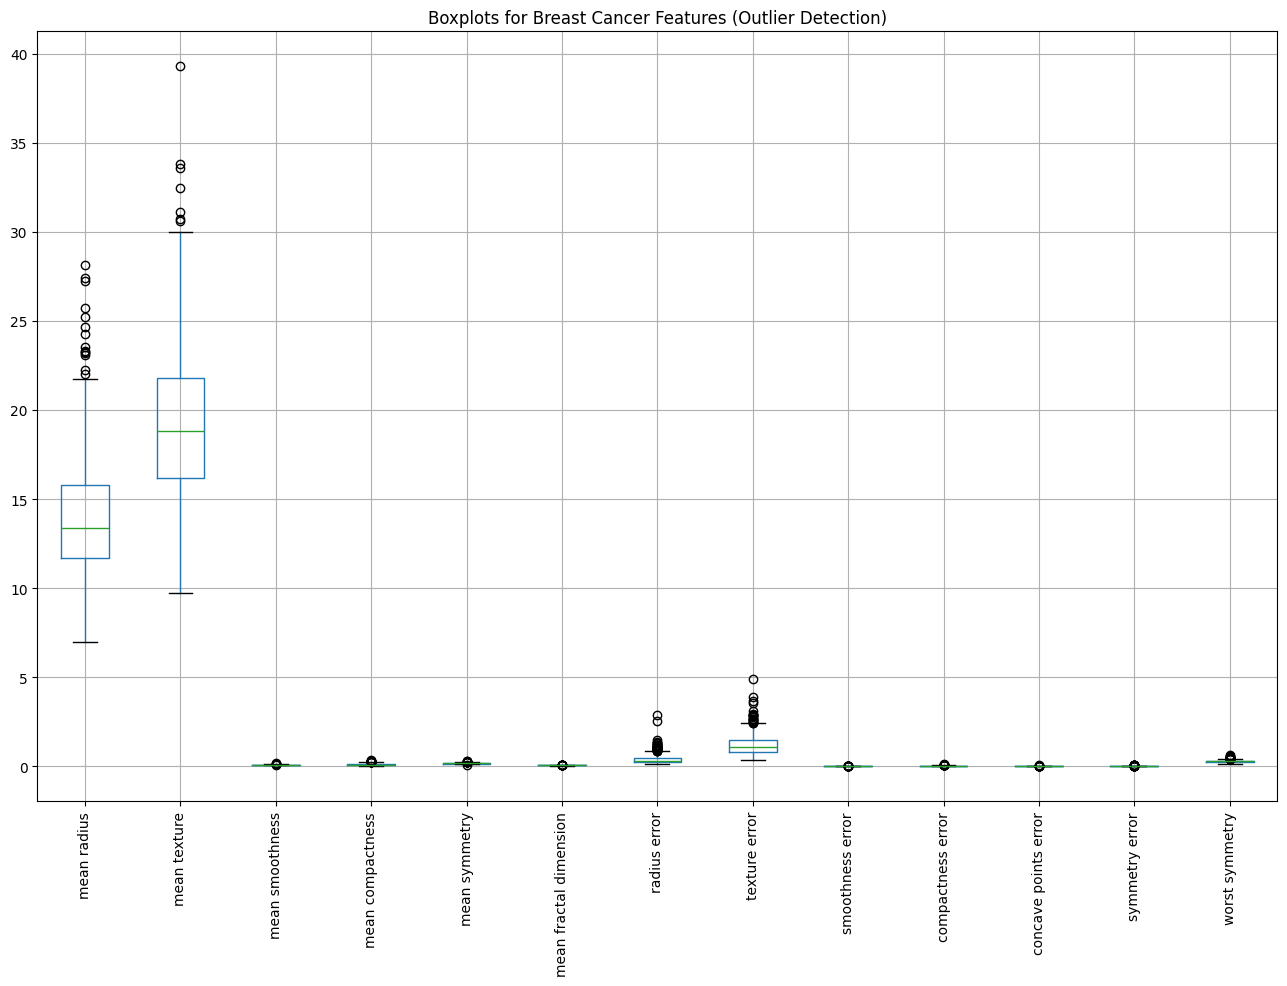

In [18]:
plt.figure(figsize=(16,10))
df.drop(columns='target').boxplot(rot=90)
plt.title("Boxplots for Breast Cancer Features (Outlier Detection)")
plt.show()


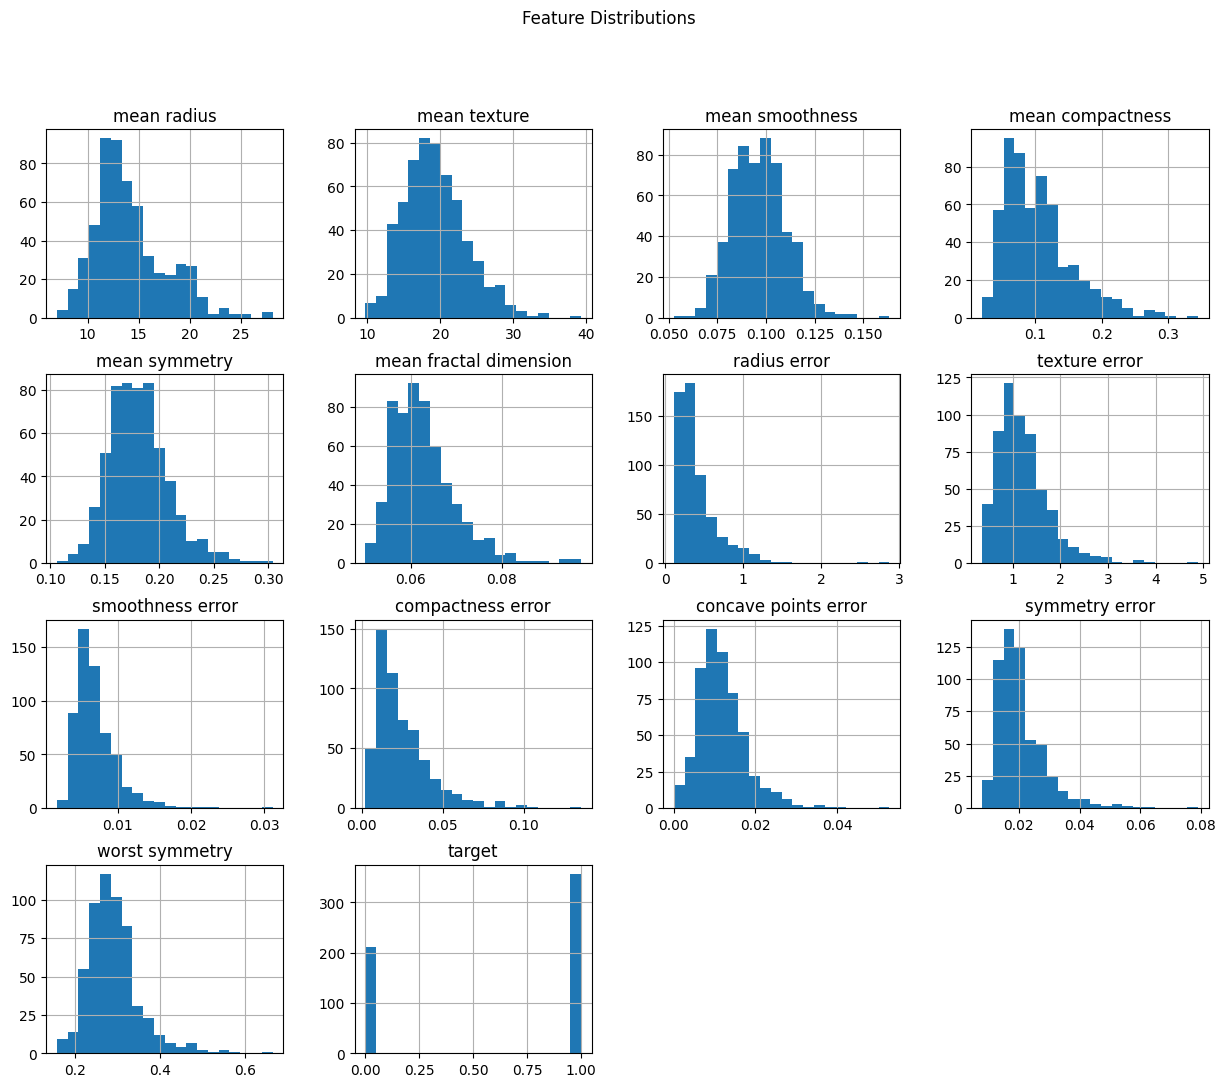

In [19]:
df.hist(figsize=(15, 12), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


In [20]:
#creating a baseline prediction
baseline = df["target"].value_counts(normalize=True).max()
baseline

np.float64(0.6274165202108963)

In [21]:
df.columns


Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'concave points error', 'symmetry error', 'worst symmetry', 'target'],
      dtype='object')

In [22]:
# Spliting vertical to Features and targets
X = df.drop(columns=["target"])
y = df["target"]
X.shape, y.shape

((569, 13), (569,))

In [23]:
#spliting horizontally to train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (114, 13), (455,), (114,))

In [24]:
#Model building
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [26]:
prediction = model.predict(X_test)

In [29]:
prediction[:5]

array([1, 0, 0, 1, 1])

In [31]:
y_test[:5]

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

In [34]:
acc = accuracy_score(y_test, model.predict(X_test))
acc

0.956140350877193

In [40]:
report = classification_report(y_test, prediction, output_dict=True)
clr = pd.DataFrame(report).transpose()
clr

,precision,recall,f1-score,support
0,0.952381,0.930233,0.941176,43.00000
1,0.958333,0.971831,0.965035,71.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.955357,0.951032,0.953106,114.00000
weighted avg,0.956088,0.956140,0.956036,114.00000


In [42]:
cfm = confusion_matrix(y_test, prediction)
cfm

array([[40,  3],
       [ 2, 69]])

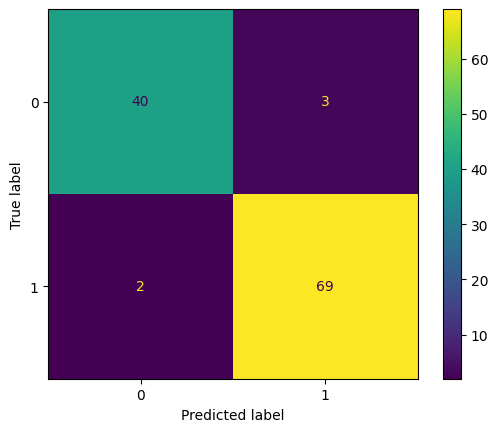

In [44]:
disp = ConfusionMatrixDisplay(cfm)
disp.plot()

In [ ]:
# getting the important features"
features = X_train.columns
coef = model.named_steps["logisticregression"].coef_[0]


array([-2.43361603, -1.22839713, -0.72951832, -0.85112409,  0.59727103,
        0.47531848, -1.84581754, -0.07605941, -0.11892005,  0.45673008,
       -0.77458945,  1.53471882, -2.58578708])

In [ ]:
#dropping the coeff to DataFrame with importance features 
imp_featur = pd.DataFrame({
    "features": features,
    "Coefficient": coef
}).sort_values(ascending=False)
imp_featur

,features,Coefficient
0,mean radius,-2.433616
1,mean texture,-1.228397
2,mean smoothness,-0.729518
3,mean compactness,-0.851124
4,mean symmetry,0.597271
5,mean fractal dimension,0.475318
6,radius error,-1.845818
7,texture error,-0.076059
8,smoothness error,-0.118920
9,compactness error,0.456730


In [46]:
df.to_csv("clean_breast_cancer_data.csv", "r")

/tmp/ipykernel_23057/247288186.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  df.to_csv("clean_breast_cancer_data.csv", "r")


In [47]:
joblib.dump(model, "break_model.pkl")

['break_model.pkl']